In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('MNIST_DATA.csv')

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=data.values
data.shape

(42000, 785)

In [5]:
np.random.shuffle(data)
split=0.8

train_x=data[:(int)(split*data.shape[0]),1:]
train_y=data[:(int)(split*data.shape[0]),0]
test_x=data[(int)(split*data.shape[0]):,1:]
test_y=data[(int)(split*data.shape[0]):,0]


In [6]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(33600, 784) (33600,) (8400, 784) (8400,)


In [7]:
def drawImg(data):
    data=data.reshape(28,28)
    plt.imshow(data)
    plt.show()

1


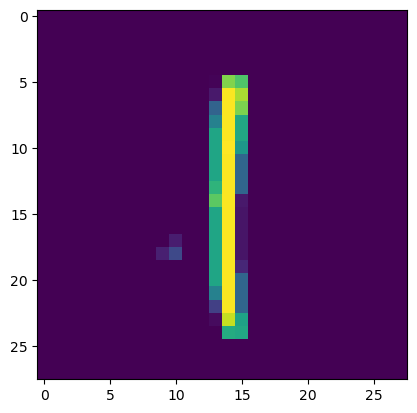

In [8]:
print(train_y[1])
drawImg(train_x[1])

In [9]:
class KNN:
    def __init__(self,k,X,Y):
        self.k=k
        self.X=X
        self.Y=Y
    def distance_formula(self,p1,p2):
        return np.sqrt(sum((p1-p2)**2))
    def predict(self,test_point):
        distance = []
        for i in range(self.X.shape[0]):
            distance.append((self.distance_formula(test_point,self.X[i]),i))
        distance=sorted(distance,key=lambda x:x[0]) #by default tuple sort by x[0] so key=lambda x:x[0] is optional
        k_distance=distance[:self.k]
        classes=[]
        for _,i in k_distance:
            classes.append(self.Y[i])
        type_class,class_count=np.unique(classes,return_counts=True)
        max_class=np.argmax(class_count)
        print(f'Predicted Class: {type_class[max_class]}, with probability of: {np.max(class_count)/np.sum(class_count)}')
        return type_class[max_class]

In [10]:
a=KNN(7,train_x,train_y)

In [11]:
print(a.predict(train_x[8]))
print(train_y[8])

Predicted Class: 8, with probability of: 1.0
8
8


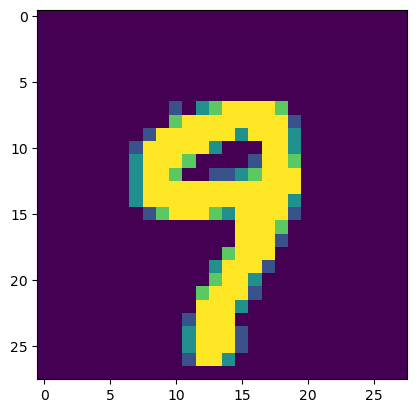

In [12]:
drawImg(train_x[7])

In [15]:
preds=[]
count=0
for i in test_x:
    preds.append(a.predict(i))
    print('on: ',count,end='\r')
    count+=1

Predicted Class: 8, with probability of: 1.0
Predicted Class: 6, with probability of: 1.0
Predicted Class: 0, with probability of: 1.0
Predicted Class: 5, with probability of: 1.0
Predicted Class: 4, with probability of: 1.0
Predicted Class: 8, with probability of: 1.0
Predicted Class: 8, with probability of: 1.0
Predicted Class: 9, with probability of: 1.0
Predicted Class: 8, with probability of: 1.0
Predicted Class: 4, with probability of: 1.0
Predicted Class: 7, with probability of: 1.0
Predicted Class: 2, with probability of: 1.0
Predicted Class: 6, with probability of: 1.0
Predicted Class: 8, with probability of: 1.0
Predicted Class: 8, with probability of: 0.7142857142857143
Predicted Class: 4, with probability of: 0.8571428571428571
Predicted Class: 1, with probability of: 1.0
Predicted Class: 9, with probability of: 1.0
Predicted Class: 7, with probability of: 0.7142857142857143
Predicted Class: 3, with probability of: 1.0
Predicted Class: 2, with probability of: 1.0
Predicted 

Predicted Class: 7, with probability of: 1.0
Predicted Class: 6, with probability of: 1.0
Predicted Class: 2, with probability of: 1.0
Predicted Class: 1, with probability of: 1.0
Predicted Class: 7, with probability of: 1.0
Predicted Class: 6, with probability of: 0.5714285714285714
Predicted Class: 4, with probability of: 1.0
Predicted Class: 7, with probability of: 1.0
Predicted Class: 7, with probability of: 0.7142857142857143
Predicted Class: 5, with probability of: 1.0
Predicted Class: 1, with probability of: 1.0
Predicted Class: 1, with probability of: 1.0
Predicted Class: 9, with probability of: 1.0
Predicted Class: 3, with probability of: 1.0
Predicted Class: 2, with probability of: 1.0
Predicted Class: 2, with probability of: 1.0
Predicted Class: 6, with probability of: 1.0
Predicted Class: 4, with probability of: 1.0
Predicted Class: 9, with probability of: 0.7142857142857143
Predicted Class: 7, with probability of: 1.0
Predicted Class: 1, with probability of: 1.0
Predicted 

KeyboardInterrupt: 

In [24]:
count=0
cor=0
for i in preds:
    if(i==test_y[count]):
        count+=1
        cor+=1
    else:
        count+=1
print((cor/count)*100)

96.7741935483871
